## Fine-tuning your model

### How good is your model?


In [2]:
import pandas as pd

In [3]:
dia = pd.read_csv('diabetes.csv')
dia.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']

y = dia['diabetes']

X = dia.drop(['diabetes'], axis=1)

In [10]:
X.shape

(768, 8)

In [11]:
y.shape

(768,)

In [12]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.4)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



### Logistic regression and the ROC curve


In [13]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[175  31]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.68      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



You now know how to use logistic regression for binary classification.

### Plotting an ROC curve

Text(0.5,1,'ROC Curve')

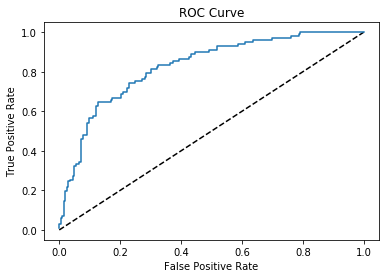

In [16]:
# Import necessary modules
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, threashold = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

This ROC curve provides a nice visual way to assess your classifier's performance.

In [17]:
y_pred_prob.shape

(308,)

In [18]:
threashold

array([0.95783779, 0.87327321, 0.85281462, 0.8252915 , 0.80955787,
       0.80245804, 0.79650877, 0.75688438, 0.75469702, 0.73770978,
       0.73532821, 0.73198842, 0.72878757, 0.71803487, 0.70808483,
       0.70407497, 0.70164731, 0.69587952, 0.69418249, 0.68360355,
       0.67430385, 0.67425934, 0.66828024, 0.66777801, 0.65936274,
       0.61420614, 0.61401966, 0.60981036, 0.59599999, 0.57244443,
       0.57077545, 0.55565896, 0.54706775, 0.54448414, 0.54112471,
       0.52003065, 0.51778948, 0.51464377, 0.48816705, 0.48727658,
       0.48711989, 0.48396258, 0.45641938, 0.45006096, 0.44889851,
       0.4421307 , 0.42818999, 0.42458005, 0.4213117 , 0.40757924,
       0.40189105, 0.40091786, 0.37790293, 0.37575894, 0.36333115,
       0.36277267, 0.36140952, 0.35727097, 0.35444268, 0.34759832,
       0.33802383, 0.33766745, 0.3367104 , 0.33413563, 0.3174213 ,
       0.31668728, 0.31543062, 0.31262927, 0.30942812, 0.30845251,
       0.2870945 , 0.28642802, 0.28470851, 0.28110944, 0.27800

In [19]:
fpr

array([0.        , 0.        , 0.00485437, 0.00485437, 0.00970874,
       0.00970874, 0.01456311, 0.01456311, 0.01941748, 0.01941748,
       0.02427184, 0.02427184, 0.02912621, 0.02912621, 0.03398058,
       0.03398058, 0.04368932, 0.04368932, 0.04854369, 0.04854369,
       0.05339806, 0.05339806, 0.0631068 , 0.0631068 , 0.07281553,
       0.07281553, 0.0776699 , 0.0776699 , 0.09223301, 0.09223301,
       0.09708738, 0.09708738, 0.11165049, 0.11165049, 0.12135922,
       0.12135922, 0.12621359, 0.12621359, 0.16990291, 0.16990291,
       0.17475728, 0.17475728, 0.2038835 , 0.2038835 , 0.20873786,
       0.20873786, 0.22330097, 0.22330097, 0.22815534, 0.22815534,
       0.24757282, 0.24757282, 0.27184466, 0.27184466, 0.2815534 ,
       0.2815534 , 0.28640777, 0.28640777, 0.30097087, 0.30097087,
       0.32038835, 0.32038835, 0.32524272, 0.32524272, 0.36407767,
       0.36407767, 0.37378641, 0.37378641, 0.39320388, 0.39320388,
       0.42718447, 0.42718447, 0.43203883, 0.43203883, 0.44660

In [20]:
tpr

array([0.00980392, 0.02941176, 0.02941176, 0.05882353, 0.05882353,
       0.06862745, 0.06862745, 0.14705882, 0.14705882, 0.19607843,
       0.19607843, 0.21568627, 0.21568627, 0.24509804, 0.24509804,
       0.25490196, 0.25490196, 0.2745098 , 0.2745098 , 0.32352941,
       0.32352941, 0.33333333, 0.33333333, 0.34313725, 0.34313725,
       0.46078431, 0.46078431, 0.48039216, 0.48039216, 0.53921569,
       0.53921569, 0.56862745, 0.56862745, 0.57843137, 0.57843137,
       0.62745098, 0.62745098, 0.64705882, 0.64705882, 0.65686275,
       0.65686275, 0.66666667, 0.66666667, 0.68627451, 0.68627451,
       0.69607843, 0.69607843, 0.71568627, 0.71568627, 0.74509804,
       0.74509804, 0.75490196, 0.75490196, 0.76470588, 0.76470588,
       0.7745098 , 0.7745098 , 0.79411765, 0.79411765, 0.81372549,
       0.81372549, 0.82352941, 0.82352941, 0.83333333, 0.83333333,
       0.84313725, 0.84313725, 0.85294118, 0.85294118, 0.8627451 ,
       0.8627451 , 0.87254902, 0.87254902, 0.89215686, 0.89215

A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.

    This is actually a true statement! Observe how when the recall is high, the precision drops.

Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes.
    
    In the case when there are no true positives or true negatives, precision is 0/0, which is undefined.


When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

    This is a correct statement. Notice how a high precision corresponds to a low recall: The classifier has a 
    high threshold to ensure the positive predictions it makes are correct, which means it may miss some positive labels that have lower probabilities.



### AUC computation

In [21]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test,y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8266228821625738
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80796296 0.81944444 0.86603774 0.85132075]


### Hyperparameter tuning with GridSearchCV

In [23]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


It looks like a 'C' of 268.27 results in the best performance.

### Hyperparameter tuning with RandomizedSearchCV


In [26]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 4}
Best score is 0.7395833333333334


RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

### Hold-out set in practice I: Classification

In [27]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


### Hold-out set in practice II: Regression

Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties

In [36]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
y = df.life
X = df.drop(['life', 'Region'], axis=1)

In [37]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)


In [38]:
X.shape

(139, 8)

In [39]:

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hakan/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398441
